<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

In [1]:
%pip install yellowbrick plotly nbformat

### Step 1 - Read the dataset

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Customer Segmentation - I want to categorise similar customers togethor

### Step 2 - Perfom basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [5]:
df.duplicated().sum()

0

### Step 3 - Get the X values
Categorize customers according to Age, Income and Spending

In [6]:
X = df[["Age", "Income", "Spending"]]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 4 - Apply Preprocessing on X

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [9]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Train Test Split is not required for unsupervised machine learning

### Step 5 - decide the number of clusters by elbow method

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

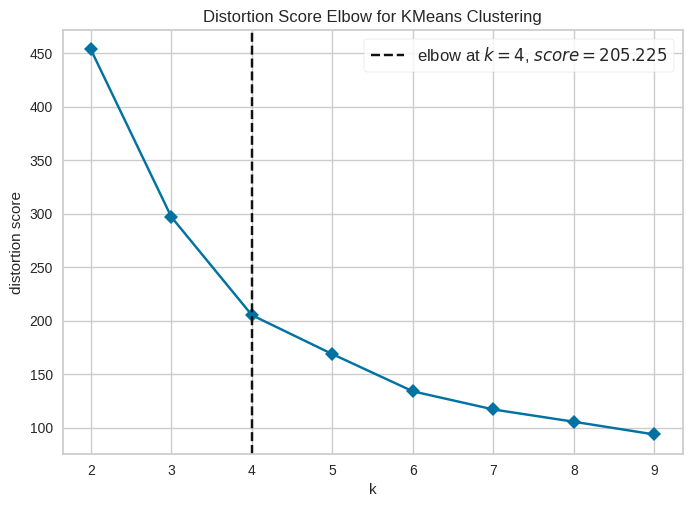

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model1 = KMeans()
visualiser = KElbowVisualizer(model1, k=(2, 10), timings=False)
visualiser.fit(X_pre)
visualiser.show()

### From above graph it is clear that i need to create 4 clusters

In [12]:
km_model = KMeans(n_clusters=5)
km_model.fit(X_pre)

KMeans(n_clusters=5)

In [13]:
labels1 = km_model.labels_
labels1

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3,
       2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 0, 3, 3, 3, 4, 4, 4, 4, 3, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [14]:
res1 = X.copy()
res1["Label"] = labels1
res1

,Age,Income,Spending,Label
0,19,15,39,3
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,3
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


In [15]:
res1.query("Label == 0")

,Age,Income,Spending,Label
112,38,64,42,0
121,38,67,40,0
124,23,70,29,0
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
132,25,72,34,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0


In [20]:
for i in range(5):
  print(f"Cluster : {i}\n")
  display(res1.query(f"Label == {i}"))
  print("\n==================================\n")

Cluster : 0



,Age,Income,Spending,Label
112,38,64,42,0
121,38,67,40,0
124,23,70,29,0
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
132,25,72,34,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0




Cluster : 1



,Age,Income,Spending,Label
122,40,69,58,1
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1




Cluster : 2



,Age,Income,Spending,Label
2,20,16,6,2
6,35,18,6,2
8,64,19,3,2
10,67,19,14,2
12,58,20,15,2
14,37,20,13,2
16,35,21,35,2
18,52,23,29,2
20,35,24,35,2
22,46,25,5,2




Cluster : 3



,Age,Income,Spending,Label
0,19,15,39,3
1,21,15,81,3
3,23,16,77,3
4,31,17,40,3
5,22,17,76,3
7,23,18,94,3
9,30,19,72,3
11,35,19,99,3
13,24,20,77,3
15,22,20,79,3




Cluster : 4



,Age,Income,Spending,Label
40,65,38,35,4
46,50,40,55,4
50,49,42,52,4
53,59,43,60,4
54,50,43,45,4
55,47,43,41,4
56,51,44,50,4
57,69,44,46,4
59,53,46,46,4
60,70,46,56,4


### Plotting above results

In [17]:
import plotly.express as px

In [18]:
fig = px.scatter_3d(res1, x="Age", y="Income", z="Spending", color="Label")
fig.show()

### Agglomerative clustering
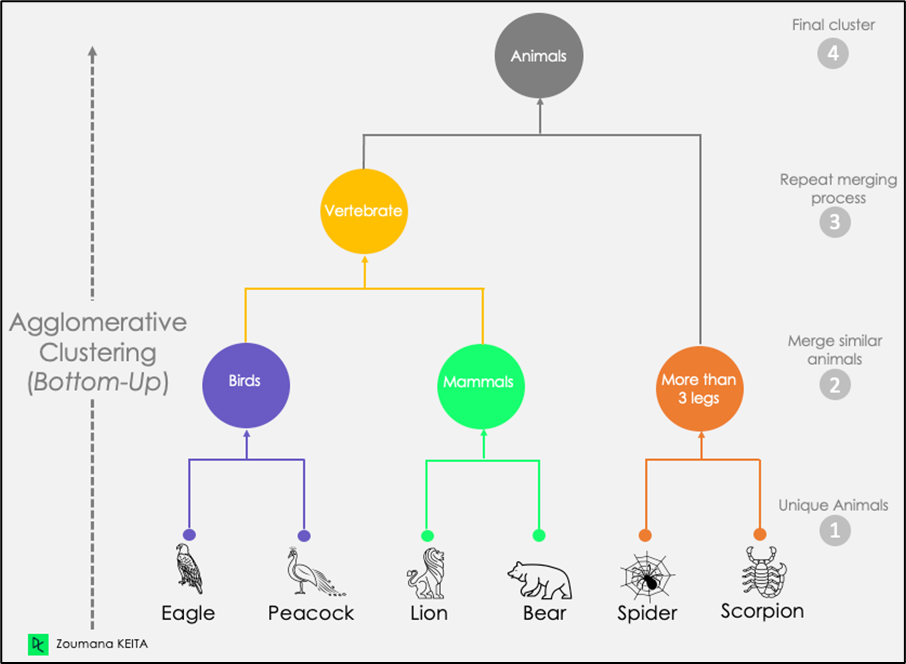

In [31]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
ag_model = AgglomerativeClustering(n_clusters=6)
ag_model.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [42]:
labels2 = ag_model.labels_
labels2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [43]:
res_ag = X.copy()
res_ag["Label"] = labels2

In [44]:
res_ag

,Age,Income,Spending,Label
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [47]:
for i in range(6):
  print(f"Cluster number : {i}")
  display(res_ag.query(f"Label == {i}"))
  print("\n=======================================\n")

Cluster number : 0


,Age,Income,Spending,Label
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Cluster number : 1


,Age,Income,Spending,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster number : 2


,Age,Income,Spending,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number : 3


,Age,Income,Spending,Label
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Cluster number : 4


,Age,Income,Spending,Label
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Cluster number : 5


,Age,Income,Spending,Label
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [46]:
fig2 = px.scatter_3d(data_frame=res_ag, x="Age", y="Income", z="Spending", color="Label")
fig2.show()